In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
A0 = 0.05984281113 
CLA = 4.752798721
CLA_STALL = -3.85 
CDA = 0.6417112299
CDA_STALL = -0.9233984055
ALPHA_STALL = 0.3391428111
WINGAREA = 0.6
AIR_DENSITY = 1.2041
MASS = 1.5
G = 9.81

In [3]:
def calc_cl(angle_of_attack):
    clift = CLA * (angle_of_attack - A0)
    return clift

def calc_v_stall(clMax):
    vStall = np.sqrt((2 * MASS * G) / (AIR_DENSITY * WINGAREA * clMax))
    return vStall

In [4]:
angleList = np.arange(0, ALPHA_STALL, 0.01 * np.pi/180)
coefficient_lift_list = [calc_cl(angle) for angle in angleList]
clMax = max(coefficient_lift_list)
clMaxWeights = [.9375, .8750, .8125, .750]
vStall = calc_v_stall(clMax)
angleListDegrees = np.rad2deg(angleList)
structural_limit = np.sqrt((2 * 5 * MASS * G) / (clMax * WINGAREA * AIR_DENSITY))

print(clMax)

1.327336258892164


In [5]:
def filter_data(dataframe, start_time, end_time):
    filtered_df = dataframe[(dataframe['time'] >= start_time) & (dataframe['time'] <= end_time)]
    return filtered_df

In [6]:
def check_bounds(predicted_velocity, predicted_load_factor, velocities_lists, calc_load_factor_lists):
    num_lines_crossed = 0
    for calc_load_factor_list in calc_load_factor_lists:
        closest_index = np.argmin(np.abs(np.array(velocities_lists) - predicted_velocity))
        closest_load_factor = calc_load_factor_list[closest_index]
        if predicted_load_factor > closest_load_factor:
            num_lines_crossed += 1
    return num_lines_crossed

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


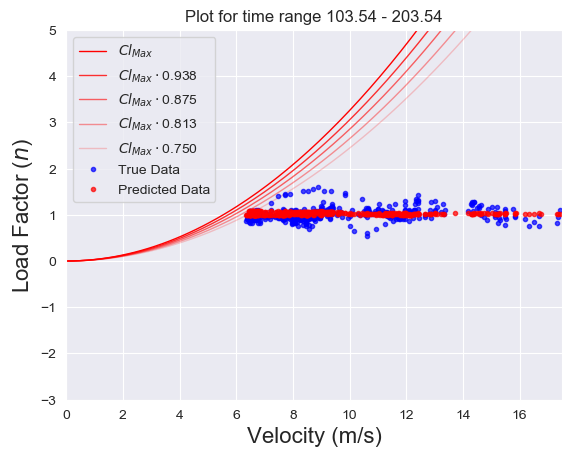

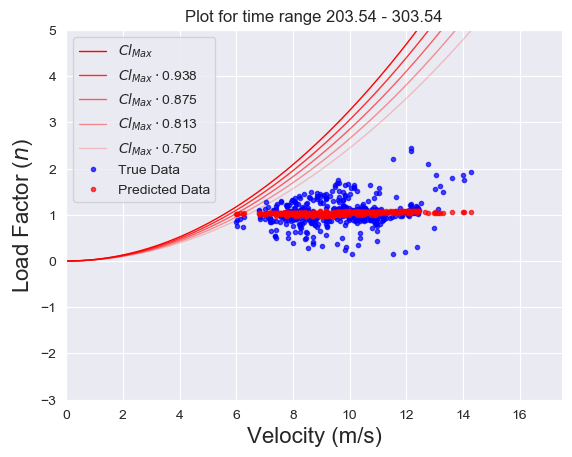

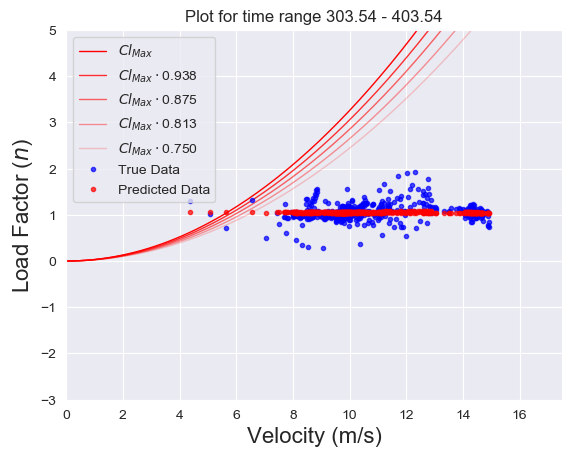

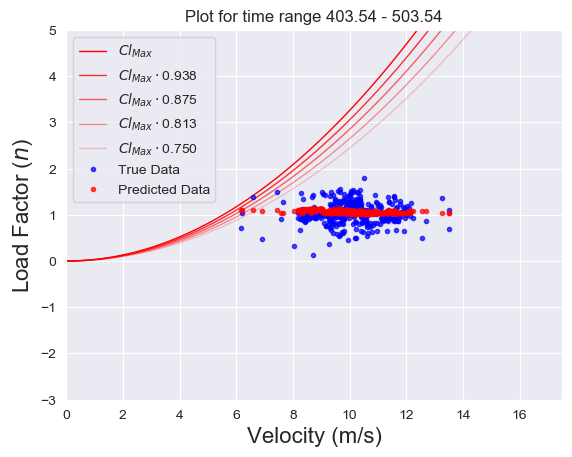

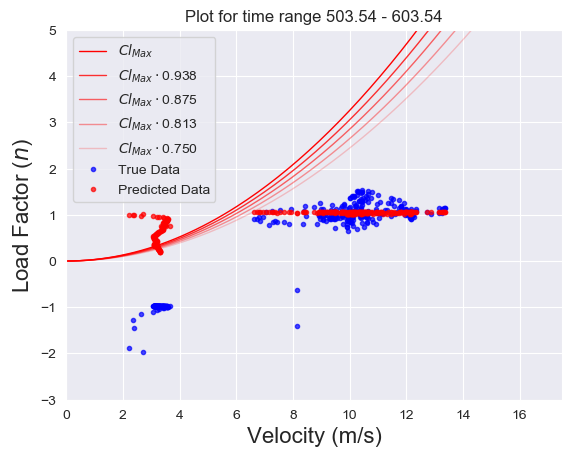

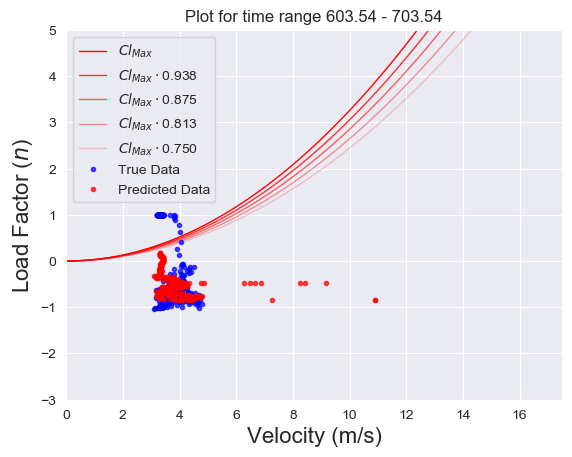

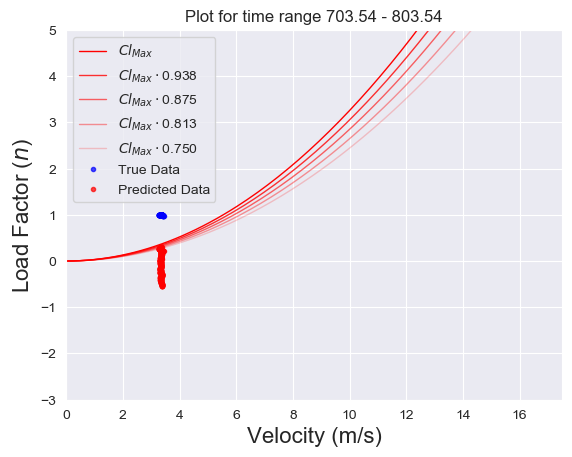

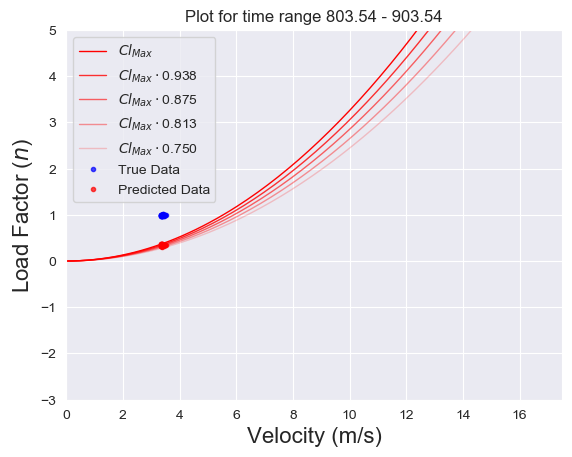

In [12]:

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []
time_data = []
true_v = []
true_n = []
predict_v = []
predict_n = []
bound = []
bounds = []

filezilla = "/home/taranto/catkin_ws/src/supervisor/flighttest/data/flightTestData.csv"
dataframe = pd.read_csv(filezilla)
total_time = dataframe["time1"].max() - dataframe["time1"].min()
num_plots = int(total_time // 100) + 1
sns.set_style('darkgrid')
velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}\cdot$0.938', '$Cl_{Max}\cdot$0.875', '$Cl_{Max}\cdot$0.813', '$Cl_{Max}\cdot$0.750']
line_colors = ['red', 'red', 'red', 'red', 'red']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)

for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

def plot_static_data(ax):
    for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
        ax.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=opacity, linewidth=1)

# Create plots for every 100 seconds
for i in range(num_plots):
    start_time = dataframe["time1"].min() + i * 100
    end_time = start_time + 100
    plot_data = dataframe[(dataframe["time1"] >= start_time) & (dataframe["time1"] < end_time)]

    # Check if there is any data in the current time range
    if not plot_data.empty:
        fig, ax = plt.subplots()
        # Plot static data
        plot_static_data(ax)
        ax.plot(plot_data["true_velocity"], plot_data["true_n"], 'o', color='blue', markersize=3, label='True Data', alpha=0.7, linewidth=1)
        ax.plot(plot_data["predicted_velocity"], plot_data["predicted_n"], 'o', markersize=3, color='red', label='Predicted Data', alpha=0.7, linewidth=1)

        # Customize your plot, e.g., set title, labels, etc.
        ax.set_title(f"Plot for time range {start_time:.2f} - {end_time:.2f}")
        ax.set_xlabel("Velocity (m/s)", fontsize=16)
        ax.set_ylabel("Load Factor ($n$)", fontsize=16)
        ax.set_ylim([-3, 5])
        ax.set_xlim(left=0, right=17.5)
        ax.legend()
        # fig.savefig(f"plot_{i}.png")
        plt.show()

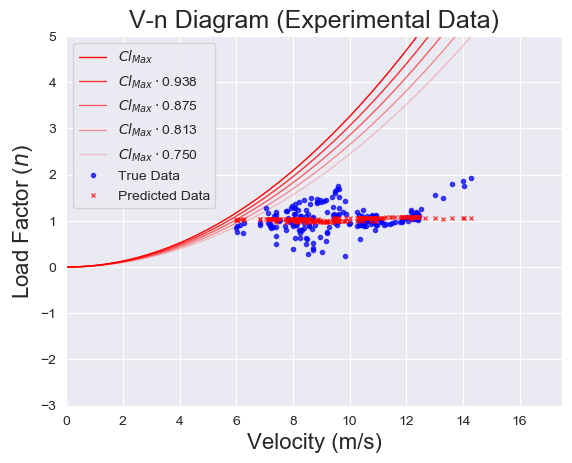

In [16]:
# Add the custom time range (in seconds) here
custom_start_time = 220
custom_end_time = 260

# Filter data for the custom time range
plot_data = dataframe[(dataframe["time1"] >= custom_start_time) & (dataframe["time1"] <= custom_end_time)]

# Check if there is any data in the current time range
if not plot_data.empty:
    fig, ax = plt.subplots()
    # Plot static data
    plot_static_data(ax)
    ax.plot(plot_data["true_velocity"], plot_data["true_n"], 'o', color='blue', markersize=3, label='True Data', alpha=0.7, linewidth=1)
    ax.plot(plot_data["predicted_velocity"], plot_data["predicted_n"], 'x', markersize=3, color='red', label='Predicted Data', alpha=0.7, linewidth=1)

    # Customize your plot, e.g., set title, labels, etc.
    ax.set_title(f"V-n Diagram (Experimental Data)", fontsize=18)
    ax.set_xlabel("Velocity (m/s)", fontsize=16)
    ax.set_ylabel("Load Factor ($n$)", fontsize=16)
    ax.set_ylim([-3, 5])
    ax.set_xlim(left=0, right=17.5)
    ax.legend()
    # fig.savefig(f"plot_custom_time_range.png")
    plt.show()